C:\Users\vatch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


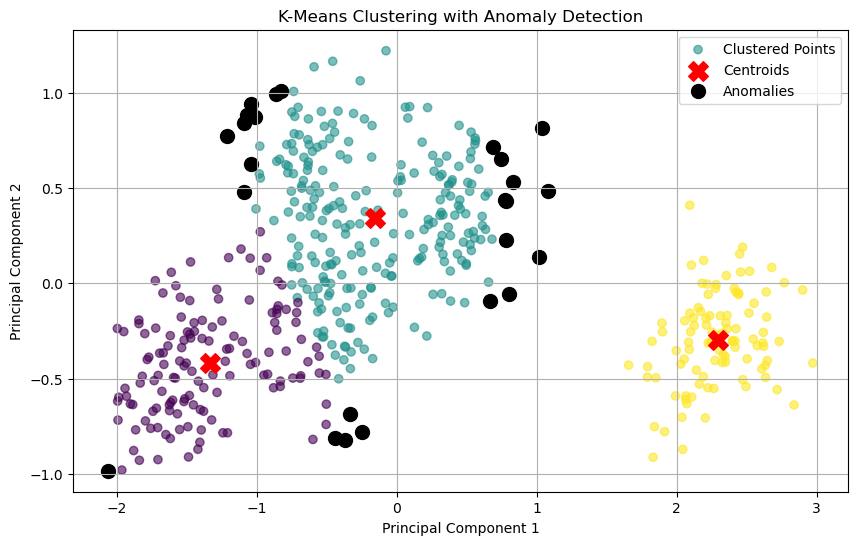

Identified Anomalies:
     Feature 1  Feature 2  Cluster  Anomaly
0     2.698582  -0.672960        1     True
53    3.549752  -1.172321        1     True
60    4.359184  -0.162352        1     True
77    2.802456  -0.291281        1     True
85    4.314576   0.855407        1     True
100   2.454314  -1.874929        1     True
132   3.139506   5.640315        0     True
163   2.843829   5.209832        0     True
255   2.899212   5.784302        0     True
263   1.746255  -0.778340        1     True
290  -3.621507   3.041604        1     True
303   3.419799   0.208214        1     True
335  -3.815524   3.169367        1     True
336  -2.973439   3.718180        1     True
340  -3.766508   3.319381        1     True
371  -3.896491   3.781935        1     True
404   2.093898  -0.759051        1     True
428   2.828520  -0.286217        1     True
430  -2.706062   4.219310        0     True
433   4.011180   1.287757        1     True
437  -1.284024  10.216205        0     True
457  -3.89

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

# Load the dataset
data = pd.read_csv("C:\\Users\\vatch\\Downloads\\archive (5)\\cluster_data.csv")

# Selecting numerical features for clustering (excluding labels or identifiers, if any)
X = data.select_dtypes(include=[np.number]).values  # Ensure we only take numeric features

# Standardizing the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA only if features >= 2
if X_scaled.shape[1] > 1:
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
else:
    X_pca = X_scaled  # Use raw standardized data if only one feature

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_pca)

# Compute distance of each point from its assigned cluster center
distances = np.min(cdist(X_pca, kmeans.cluster_centers_, 'euclidean'), axis=1)
threshold = np.percentile(distances, 95)  # Set threshold for anomalies (top 5% farthest points)
data['Anomaly'] = distances > threshold

# Visualizing Clusters and Anomalies only if features >= 2
if X_scaled.shape[1] > 1:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.6, label='Clustered Points')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.scatter(X_pca[data['Anomaly'], 0], X_pca[data['Anomaly'], 1], c='black', marker='o', s=100, label='Anomalies')
    plt.title('K-Means Clustering with Anomaly Detection')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid()
    plt.show()

# Print Anomalies
print("Identified Anomalies:")
print(data[data['Anomaly']])